# Lab 1: Simple Connectionist Models of Language

Lab design and questions:
- 2019, 2020 (original): J. Spenader.
- 2022 (revision): N. de Jong.

Python code versions:
- 2019 (original): Wietse de Vries.
- 2020 (revision): Kim van Arkel & Tziafas.
- 2021 (revision): J. Spenader.

## Learning Goals for this lab:

* Get used to use the Keras deep learning framework
* Build simple feed-forward connectionist networks
* Understand the usefulness of hidden layers
* Understand the features of simple recurrent networks (SRNs)
* Build a simple recurrent network by using Keras that performs the same modelling experiment as Elman (1990)
* Carry out a follow-up experiment with the Elman (1990) network
* Answer questions related to Elman (1990)
* All lab reports should be handed in individually. However, most questions can be compeleted in pairs if desired. The exception is Exercise 6 at the end of the lab. Exercise 6 should be answered individually. If you work together, please clearly identify who you worked with in your homework. Also, please add your name and student number to the first page of the homework.

Note: only **boldface** questions next to capital letters in "Exercise" sections need to be included in the report. Other questions are rhetorical.

# Part 1: Learning boolean operators using a feed-forward neural networks

In this section, you will learn how to create a simple feed-forward neural network in Python by using [Keras](https://keras.io/). Feed-forward neural networks are one of the simplest types, because all information is passed on in one direction (forward!), with no information being 'looped' back into the netwokr. 

Keras is a high-level neural network API that runs on top of lower level neural network libraries like Tensorflow or Theano. Since the Tensorflow 2.0 official release, Keras is integrated as a back-end to the Tensorflow framework. Keras will let use easily build neural networks by simply defining what their design architecture should be. 

Before we get started, make sure you have installed Keras with a backend of your choice. Follow the [official instructions](https://keras.io/#installation) by Keras or get started quickly by running the following commands:

```
pip3 install tensorflow
pip3 install keras
```

This is all you need to do to get started creating your first neural network! Now we are ready to create your first neural network that simulates the boolean AND operator.

## Model definition

To set up our neural network, e.g. define our 'model', we have to import some modules from Keras:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Now we want to create very simple perceptron model that has two binary input nodes (that accept `0`'s or `1`'s), and a single binary output node that outputs a  `1` if and only if both inputs were `1`, and otherwise will output a `0`. (Can you already guess what function this network models?)

In Keras, we can create a simple feed-forward neural network by creating what's termed a  [`Sequential`](https://keras.io/models/sequential/) model. We'll call it `model_1` since it's our first model. Within a `Sequential` model, an arbitrary number of layers can be defined. The last layer is the output layer and any preceding layers are hidden layers. The first layer in the model requires information about the input shape, i.e. how many nodes are 'sending through' input. Note that the input layer is not explicitly defined as a layer in a `Sequential` Keras model.

The model can be defined the following way:

In [2]:
model_1 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


This command will create a feed-forward network (a `model`) that contains a single layer, the output layer with one node (one unit). The [`Dense`](https://keras.io/layers/core/) layer type means that this is a type of basic neural network layer in which all units are connected to all units in the previous layer (not very relevant for the current network because it's so simple, but it will be relevant later on). Inside the `Dense` expression we also say how many input nodes there are with the input_dim=2 information. For this network we have also used the `tanh` [activation function](https://keras.io/activations/).  Note also that by default, every unit in a dense layer also has a bias, so this does not need to be explicitly defined. 
After defining the model, it has be be compiled, i.e. it has to be run, in a process where the weights will be modified depending on how well the network does in predicting the output given some input. 

In [3]:
model_1.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In compiling, the model will try to minimize error, also known as `loss`. We use the mean squared error [loss](https://keras.io/losses/) function to cacluate loss with the stochastic gradient descent [optimizer](https://keras.io/optimizers/). (It is a good idea to read a bit about this and familiarize yourself with these terms). The learning rate and momentum often have to be chosen by trial an error. In choosing these settings the goal is often to choose values that lead to the fastest or most accurate performance. But for our purposes we often instead want to prioritize settings that are realistic for simulating human learning and human performance. 

The `compile` method also allows definition of [metrics](https://keras.io/metrics/), i.e. ways in which you can evaluate the quality of the results. This does not influence training, but just gives us some nice information to analyze (and hopefully graph!).

## Training

Before we start training however, we need some training data. Python machine learning conventions are that input data is defined as an `X` variable and the corresponding target output as `y`. Recall that our model has only two input nodes, so this means the only possibilities (since these are binary input nodes) is one of four possible combinations of `0`s and `1`s. See below. So we will need two-dimensional input values, and our goal is to learn to predict the one-dimensional output given in `y,` such that only when both input values are `1` do we output `1`.  

In [4]:
import numpy as np

In [5]:
X = np.array([(0,0), (1,0), (0,1), (1,1)])
y = np.array([0, 0, 0, 1])

Now we can train our model using the command `model.fit()`. We'll store the training in `history`. We'll train for 15 epochs, which means that we'll run the entire training set (shuffled) trhough the network, each time revising the weights based on the difference between our output and `y`, 15 times. We would also like to know what is going on as it's running, so we'll ask for to see some output information during training (e.g. `verbose=2`). 


---


Submission Notes: After you've seen how the model trains, and noted your observations, you can set `verbose=0` for submission. If you submit a PDF, you should also only include the graphs or a summary and notes on your observations, not the results of every epoch).

In [6]:
history = model_1.fit(X, y, epochs=15, shuffle=True, verbose=2)

Epoch 1/15
 - 0s - loss: 1.1368 - acc: 0.2500
Epoch 2/15
 - 0s - loss: 0.9710 - acc: 0.5000
Epoch 3/15
 - 0s - loss: 0.5742 - acc: 0.7500
Epoch 4/15
 - 0s - loss: 0.3515 - acc: 0.2500
Epoch 5/15
 - 0s - loss: 0.4802 - acc: 0.2500
Epoch 6/15
 - 0s - loss: 0.5263 - acc: 0.2500
Epoch 7/15
 - 0s - loss: 0.5132 - acc: 0.2500
Epoch 8/15
 - 0s - loss: 0.4497 - acc: 0.2500
Epoch 9/15
 - 0s - loss: 0.3217 - acc: 0.5000
Epoch 10/15
 - 0s - loss: 0.1404 - acc: 0.7500
Epoch 11/15
 - 0s - loss: 0.1021 - acc: 0.7500
Epoch 12/15
 - 0s - loss: 0.2269 - acc: 0.5000
Epoch 13/15
 - 0s - loss: 0.1361 - acc: 0.5000
Epoch 14/15
 - 0s - loss: 0.0934 - acc: 1.0000
Epoch 15/15
 - 0s - loss: 0.1335 - acc: 1.0000


An accuracy of `1.0` seems good. This means that the model now always makes the correct prediction. Let's look more closely at the training process. The easiest way to understand the training process is to graph it so that we can examine it visually.

In [7]:
import matplotlib.pyplot as plt

With the below code snippet, you can visualise the loss and the accuracy progression of your trained model through the `'loss'` and `'acc'` keys of the dictionary object `history.history`: 

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


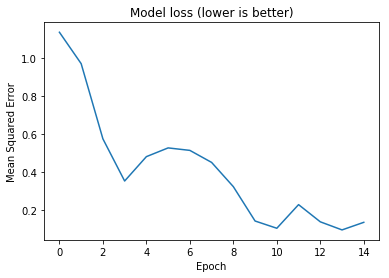

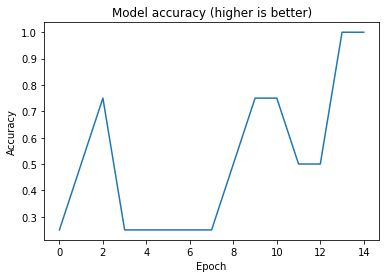

In [9]:
plt.plot(history.history['loss'])
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['acc'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Note that the loss decreases nicely, but it is not yet completely zero. For deterministic problems like a simple AND operation this would be possible but in real world scenario's having a zero loss is often impossible.

## Exercise 1

**A) Draw the architecture diagram of the neural network with circles and arrows. How many nodes does the model have (incl. bias)?.**

<img src="Data/image1.png">

**B) What is the formula that describes the output `y'` with respect to the inputs `(x1,x2)` (Hint: use w1 and w2 for weights)?**

y' = w1*x1 +w2*x2

**C) What is the loss function used for training this model? Provide it's formula for model predictions `y'` and
target outputs `y`.**

Loss function used: Mean squared error
<img src="Data/image2.png">

## Network analysis

To see what the network learned, we can visualize the model weights using a special function that was designed for this lab, called  `plot_functions.py`. This function is in the Lab folder on Nestor. The function will show us the network with its weights, showing positive weights in red, and negative weights in blue. 

In [10]:
import plot_functions

In [11]:
from plot_functions import plot_weight_matrix, plot_activation_matrix

Now we see that the output is only above 0.5 if both input values are 1. Let's see what the exact outputs are for our four possible inputs:

/Users/pedrorodriguezdeledesmajimenez/opt/anaconda3/envs/ComputerSimulationOfLanguage/lib/python3.5/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


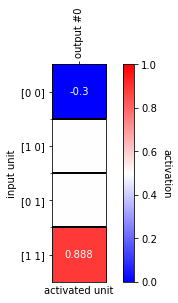

In [12]:
plot_activation_matrix(model_1, X, vmin=0, vmax=1)

## Exercise 2

**A) Re-run the model, but this time only run 4 or 5 Epochs (so that you don't get 1.00 accuracy). Then plot the weight matrix for the model. Multiply the inputs by the weights to get the output. Explain how the model works and why it does not get all cases correct.**

In [13]:
model_2 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])

In [14]:
model_2.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In [15]:
history2 = model_2.fit(X, y, epochs=4, shuffle=True, verbose=2)

Epoch 1/4
 - 0s - loss: 1.0975 - acc: 0.5000
Epoch 2/4
 - 0s - loss: 0.9615 - acc: 0.5000
Epoch 3/4
 - 0s - loss: 0.6302 - acc: 0.7500
Epoch 4/4
 - 0s - loss: 0.3214 - acc: 0.2500


In [16]:
print('Predicted value: ',model_2.predict(X))

Predicted value:  [[0.7184207 ]
 [0.87363124]
 [0.6779431 ]
 [0.8535641 ]]


### Weights of both model.
Model 1 with 10 epochs
Model 2 with 4 epochs

In [17]:
weights, bias =model_1.get_weights()
weights2, bias2 =model_2.get_weights()
print(weights)
print('----')
print(weights2)

[[0.86265117]
 [0.86051023]]
----
[[ 0.44384098]
 [-0.07907537]]


The model has some initial weights and biases and during the training/fit phase, we find the values for the parameters that best describe the set data in order to predict new datapoints category. In each epoch we improve the values with a training technique, is this case the stochastic gradient descent method is being used. Therefore, in each epoch compute the direction of the gradient and adjust the weight based on the gradient.

We can see that the computed weights of each model are different after training n number of epochs. This is because in each epoch the weights are recalculated or trained by adding or subtracting a proportional part of the gradient of the weights related to the cost function. Therefore, in the last model the weights didn't had enough epochs to get an accurate model and calculate the weights that best describe the data set.

The gradients of each weight related to the cost function (mean squared error in this model) are obtained by computing the derivative of the cost function based on the weights of the model. 

The training process mentioned is done with the Stochastic gradient descent technique computing the next formula:

--->>  w(t+1)= w(t) - learning_rate * gradient_w(t)

Now we are computing the values with the formula: <br>
predicted_value = X_1*weights_j + X_2 * weights_i + bias

In [18]:
# Hyperbolic Tangent (htan) Activation Function
def htan(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

In [19]:
# We calculate the predicte value manualy 
for row in range(len(X)):
    predicted_value = 0
    predicted_value = htan(X[row][0]*weights2[0] + X[row][1] * weights2[1] + bias2)
    print('Sample:',row, ' --> ',predicted_value, ' and real value -->', y[row])

Sample: 0  -->  [0.7184207]  and real value --> 0
Sample: 1  -->  [0.8736312]  and real value --> 0
Sample: 2  -->  [0.67794317]  and real value --> 0
Sample: 3  -->  [0.8535641]  and real value --> 1


In [20]:
print('Predicted value: ',model_2.predict(X))

Predicted value:  [[0.7184207 ]
 [0.87363124]
 [0.6779431 ]
 [0.8535641 ]]


**B) Now that you know how to define and train a simple model, try to model the inclusive OR operator instead of AND using the same model. You don't have to change the model architecture: simply create a new training data and your own training data (X) and target output (y) for inclusive OR.**

In [21]:
X = np.array([(0,0), (1,0), (0,1), (1,1)])
y = np.array([0, 1, 1, 1])

In [22]:
model_3 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])

In [23]:
model_3.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In [24]:
history3 = model_3.fit(X, y, epochs=15, shuffle=True, verbose=2)

Epoch 1/15
 - 0s - loss: 0.6342 - acc: 0.5000
Epoch 2/15
 - 0s - loss: 0.2830 - acc: 0.7500
Epoch 3/15
 - 0s - loss: 0.1131 - acc: 0.7500
Epoch 4/15
 - 0s - loss: 0.1258 - acc: 0.7500
Epoch 5/15
 - 0s - loss: 0.1478 - acc: 0.7500
Epoch 6/15
 - 0s - loss: 0.1590 - acc: 0.7500
Epoch 7/15
 - 0s - loss: 0.1617 - acc: 0.7500
Epoch 8/15
 - 0s - loss: 0.1578 - acc: 0.7500
Epoch 9/15
 - 0s - loss: 0.1478 - acc: 0.7500
Epoch 10/15
 - 0s - loss: 0.1315 - acc: 0.7500
Epoch 11/15
 - 0s - loss: 0.1081 - acc: 0.7500
Epoch 12/15
 - 0s - loss: 0.0776 - acc: 0.7500
Epoch 13/15
 - 0s - loss: 0.0438 - acc: 1.0000
Epoch 14/15
 - 0s - loss: 0.0157 - acc: 1.0000
Epoch 15/15
 - 0s - loss: 0.0037 - acc: 1.0000


We needed 13 to get 100% accuracy

**C) What is the resulting loss compared to the AND implementation? Plot the loss and accuracy and include these plots in your answer. Is the model able to deal correctly with inclusive OR ? How does the model work? Explain your answer by referring to the weights learned.**

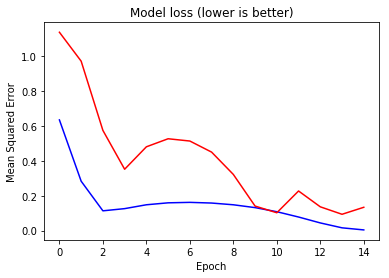

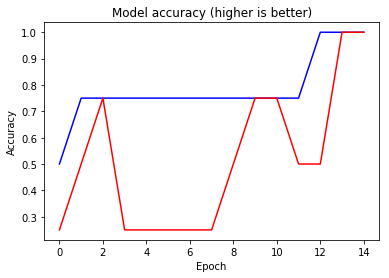

In [25]:
plt.plot(history3.history['loss'], color="blue")
plt.plot(history.history['loss'], color="red")
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(history3.history['acc'],color="blue")
plt.plot(history.history['acc'], color="red")
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

We can see that the model has learned faster than the model with the AND operator data. This is because the operator OR has an easier logic to learn: if there is an input, then 1. We can see this in the weights, where all the values are positives and higher than in previous models. This way, if there is an input, the tanh activation function will fire.

In [26]:
weights3, bias3 =model_3.get_weights()
print(weights3, bias3)

[[1.4865892]
 [1.6705327]] [-0.10540853]


Here we can see the tanh activation function. Is important the bias too becuase it move the tanh activation function in the X axis.

<img src="Data/TanhReal.png">

**D) Try to do the same for the exclusive OR (XOR) operator. Create training and target data and use the same model to train. What do you notice? Explain what problems you encounter and why.**

In [27]:
X = np.array([(0,0), (1,0), (0,1), (1,1)])
y = np.array([0, 1, 1, 0])

In [28]:
model_4 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])

In [29]:
model_4.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In [30]:
history4 = model_4.fit(X, y, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
 - 0s - loss: 0.2552 - acc: 0.7500
Epoch 2/30
 - 0s - loss: 0.2549 - acc: 0.7500
Epoch 3/30
 - 0s - loss: 0.2545 - acc: 0.7500
Epoch 4/30
 - 0s - loss: 0.2543 - acc: 0.7500
Epoch 5/30
 - 0s - loss: 0.2542 - acc: 0.7500
Epoch 6/30
 - 0s - loss: 0.2542 - acc: 0.7500
Epoch 7/30
 - 0s - loss: 0.2542 - acc: 0.7500
Epoch 8/30
 - 0s - loss: 0.2541 - acc: 0.7500
Epoch 9/30
 - 0s - loss: 0.2540 - acc: 0.7500
Epoch 10/30
 - 0s - loss: 0.2538 - acc: 0.7500
Epoch 11/30
 - 0s - loss: 0.2537 - acc: 0.7500
Epoch 12/30
 - 0s - loss: 0.2536 - acc: 0.7500
Epoch 13/30
 - 0s - loss: 0.2535 - acc: 0.7500
Epoch 14/30
 - 0s - loss: 0.2534 - acc: 0.7500
Epoch 15/30
 - 0s - loss: 0.2534 - acc: 0.7500
Epoch 16/30
 - 0s - loss: 0.2533 - acc: 0.7500
Epoch 17/30
 - 0s - loss: 0.2532 - acc: 0.7500
Epoch 18/30
 - 0s - loss: 0.2531 - acc: 0.7500
Epoch 19/30
 - 0s - loss: 0.2530 - acc: 0.7500
Epoch 20/30
 - 0s - loss: 0.2530 - acc: 0.7500
Epoch 21/30
 - 0s - loss: 0.2529 - acc: 0.7500
Epoch 22/30
 - 0s - lo

In [31]:
# list all data in history
print(history4.history.keys())

dict_keys(['loss', 'acc'])


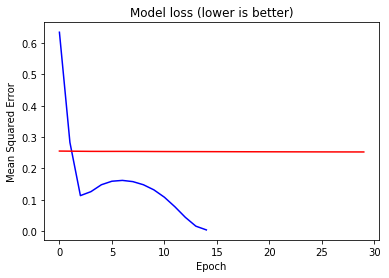

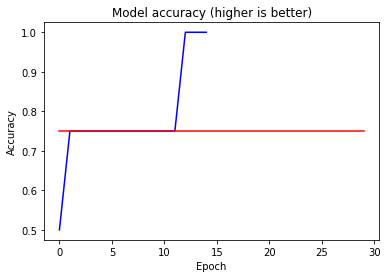

In [32]:
plt.plot(history3.history['loss'], color="blue")
plt.plot(history4.history['loss'], color="red")
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(history3.history['acc'],color="blue")
plt.plot(history4.history['acc'], color="red")
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

We can see that the last model with the XOR operator can reach the 100% accuracy. This is because we can't create a line that can classify the points correctly and separate the 2D space in two regions. For this specific case we need a multiperceptron.

**E) Create a new network model that does solve the XOR problem. You can do this by adding an additional `Dense` layer with two units to the network. Note: to do this, the `input_dim` parameter will need to be moved to the first layer.**

In [33]:
model_5 = Sequential([
    Dense(2, input_dim=2, activation='tanh', name='layer1'),
    Dense(1, activation='tanh', name='output')
])

In [34]:
model_5.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In [35]:
history4 = model_5.fit(X, y, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
 - 0s - loss: 0.3372 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.2435 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.2465 - acc: 0.7500
Epoch 4/100
 - 0s - loss: 0.2299 - acc: 0.7500
Epoch 5/100
 - 0s - loss: 0.1864 - acc: 0.7500
Epoch 6/100
 - 0s - loss: 0.1767 - acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.1939 - acc: 0.7500
Epoch 8/100
 - 0s - loss: 0.1719 - acc: 0.7500
Epoch 9/100
 - 0s - loss: 0.1680 - acc: 0.7500
Epoch 10/100
 - 0s - loss: 0.1740 - acc: 0.7500
Epoch 11/100
 - 0s - loss: 0.1668 - acc: 0.7500
Epoch 12/100
 - 0s - loss: 0.1572 - acc: 0.7500
Epoch 13/100
 - 0s - loss: 0.1576 - acc: 0.7500
Epoch 14/100
 - 0s - loss: 0.1538 - acc: 0.7500
Epoch 15/100
 - 0s - loss: 0.1452 - acc: 0.7500
Epoch 16/100
 - 0s - loss: 0.1427 - acc: 0.7500
Epoch 17/100
 - 0s - loss: 0.1388 - acc: 0.7500
Epoch 18/100
 - 0s - loss: 0.1311 - acc: 0.7500
Epoch 19/100
 - 0s - loss: 0.1259 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 0.1200 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 0.1118 - acc: 1.0000
E

**F) How successful is this new model? Also, how does your network solve the problem? Look at the weight matrix of your trained model, include it in your report with a short paragraph describing in words how the model works.**

The new model obtain 100% accuracy, but needed many epoch to train the weights. The input get multiply by the weights, each input with two weights ( total four in the first layer, two per input and per neuron). After the bias are add (one per neuron, total two) and the values pass through the activation function. The two activated values of the neurons again get multiply by weights (two) and finaly arrive to the output neuron were again an activation function is used. One unit is highly activated when the input sequence is a series of identical elements(all 1s or 0s), whereas the other unit is highly activated when the input elements alternate.

In [36]:
weights1, weights2, bias1, bias2 =model_5.get_weights()
print(weights1, weights2)

[[1.008228  2.1196685]
 [1.0401969 2.2887452]] [-1.4729971  -0.73707575]


# Part 2: Modelling Sequential XOR with Simple Recurrent Neural Networks

If you have completed the previous exercise, you have solved the XOR problem using a feed-forward neural network in Keras. But feed-forwad networks do not have any way to keep track of sequences of words in time, where the words may depend on each other. But language use does rely on information about the previous word for interpreting the next. To be able to include this kind of temporal/memory information in a simple network, we need to use something more complex than a feed forward model.  In this section,  we will create our first simple recurrent neural network. This network is a reproduction of the sequential XOR network by Elman (1990).

The input for our network will be a single 3,000-bit which is created by concatenating 1,000 random XOR sequences. Every first and second bit is random and the third bit is the XOR of the first two values. The network tries to predict the next bit in the sequence. For this, the network needs to remember information about previous inputs since that is the only way to correctly predict every third input.

_Elman, J. L. (1990). Finding structure in time. Cognitive science, 14(2), 179-211._

In [37]:
np.random.seed(1990)  # Use random seed for reproducability

## Model definition

Let's again define a very simple network, this time with a single input and output unit. But we'll add more complexity by adding an additional dimension: we'll store in a memory what the output weights of the previous input were, i.e. we'll keep some information about the step before the data we are analyzing. This will be accomplished by using what's called a `Time Distributed` unit, which will give us the memory we need. First, import necessary `keras` packages:

In [38]:
from tensorflow.keras.layers import SimpleRNN, TimeDistributed
from tensorflow.keras.initializers import Constant

In [39]:
model = Sequential([
    SimpleRNN(2, input_shape=(3000, 1),
              return_sequences=True,
              activation='tanh',
              recurrent_initializer=Constant(0.5),
              name='hidden'),
    TimeDistributed(Dense(1, activation='sigmoid', name='output'))
])

model.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.4, momentum=0.9),
              metrics=['binary_accuracy'])

In the model above, we define a simple recurrent neural network with [`SimpleRNN`](https://keras.io/layers/recurrent/#simplernn) with 2 units in the recurrent hidden layer. Its input shape is `(3000, 1)` which corresponds to 3000 time steps with 1 dimension each. The `return_sequences=True` argument makes sure that activation is passed on to the next layer for every time step instead of only the final time step activation. We want that the network makes a seperate prediction for every time step, so the output layer is wrapped inside of `TimeDistributed`. This wrapper makes it possible to backpropagate for every time step consequtively instead of optimizing the complete sequence at once.

## Training

Now we can create our training data. This is a concatenation of 1000 random XOR problems.

In [40]:
xor_data = np.array([(0,0,0), (0,1,1), (1,0,1), (1,1,0)])
xor_sequence = np.ravel(xor_data[np.random.randint(4, size=1001)])

X = xor_sequence[np.newaxis, :-3, np.newaxis]
y = xor_sequence[np.newaxis, 1:-2, np.newaxis]

X.shape, y.shape

((1, 3000, 1), (1, 3000, 1))

In [41]:
X[0][100], y[0][100]

(array([1]), array([0]))

In [42]:
X[0].shape

(3000, 1)

The X and y shapes must be `(input_size, timesteps, input_dim)`. We only train a single sequence, it has 3000 time steps and it has 1 dimension.

Lets's look at how well the network can learn our training data:

In [43]:
history = model.fit(X, y, epochs=300, verbose=2)

Epoch 1/300
 - 1s - loss: 0.3760 - binary_accuracy: 0.4890
Epoch 2/300
 - 1s - loss: 0.3640 - binary_accuracy: 0.4887
Epoch 3/300
 - 1s - loss: 0.3412 - binary_accuracy: 0.4880
Epoch 4/300
 - 1s - loss: 0.3126 - binary_accuracy: 0.4830
Epoch 5/300
 - 1s - loss: 0.2860 - binary_accuracy: 0.4310
Epoch 6/300
 - 1s - loss: 0.2694 - binary_accuracy: 0.5097
Epoch 7/300
 - 1s - loss: 0.2662 - binary_accuracy: 0.5557
Epoch 8/300
 - 1s - loss: 0.2718 - binary_accuracy: 0.5110
Epoch 9/300
 - 1s - loss: 0.2781 - binary_accuracy: 0.5110
Epoch 10/300
 - 1s - loss: 0.2815 - binary_accuracy: 0.5110
Epoch 11/300
 - 1s - loss: 0.2812 - binary_accuracy: 0.5110
Epoch 12/300
 - 1s - loss: 0.2780 - binary_accuracy: 0.5110
Epoch 13/300
 - 1s - loss: 0.2728 - binary_accuracy: 0.5110
Epoch 14/300
 - 1s - loss: 0.2667 - binary_accuracy: 0.5110
Epoch 15/300
 - 1s - loss: 0.2607 - binary_accuracy: 0.5110
Epoch 16/300
 - 1s - loss: 0.2558 - binary_accuracy: 0.5110
Epoch 17/300
 - 1s - loss: 0.2525 - binary_accura

 - 1s - loss: 0.2351 - binary_accuracy: 0.6387
Epoch 138/300
 - 1s - loss: 0.2348 - binary_accuracy: 0.6447
Epoch 139/300
 - 1s - loss: 0.2345 - binary_accuracy: 0.6447
Epoch 140/300
 - 1s - loss: 0.2343 - binary_accuracy: 0.6447
Epoch 141/300
 - 1s - loss: 0.2340 - binary_accuracy: 0.6507
Epoch 142/300
 - 1s - loss: 0.2337 - binary_accuracy: 0.6530
Epoch 143/300
 - 1s - loss: 0.2334 - binary_accuracy: 0.6553
Epoch 144/300
 - 1s - loss: 0.2332 - binary_accuracy: 0.6573
Epoch 145/300
 - 1s - loss: 0.2329 - binary_accuracy: 0.6600
Epoch 146/300
 - 1s - loss: 0.2326 - binary_accuracy: 0.6657
Epoch 147/300
 - 1s - loss: 0.2324 - binary_accuracy: 0.6657
Epoch 148/300
 - 1s - loss: 0.2321 - binary_accuracy: 0.6657
Epoch 149/300
 - 1s - loss: 0.2319 - binary_accuracy: 0.6657
Epoch 150/300
 - 1s - loss: 0.2317 - binary_accuracy: 0.6657
Epoch 151/300
 - 1s - loss: 0.2314 - binary_accuracy: 0.6657
Epoch 152/300
 - 1s - loss: 0.2312 - binary_accuracy: 0.6657
Epoch 153/300
 - 1s - loss: 0.2310 - b

Epoch 272/300
 - 1s - loss: 0.2068 - binary_accuracy: 0.6650
Epoch 273/300
 - 1s - loss: 0.2067 - binary_accuracy: 0.6660
Epoch 274/300
 - 1s - loss: 0.2068 - binary_accuracy: 0.6663
Epoch 275/300
 - 1s - loss: 0.2067 - binary_accuracy: 0.6667
Epoch 276/300
 - 1s - loss: 0.2066 - binary_accuracy: 0.6667
Epoch 277/300
 - 1s - loss: 0.2066 - binary_accuracy: 0.6673
Epoch 278/300
 - 1s - loss: 0.2066 - binary_accuracy: 0.6680
Epoch 279/300
 - 1s - loss: 0.2066 - binary_accuracy: 0.6667
Epoch 280/300
 - 1s - loss: 0.2064 - binary_accuracy: 0.6663
Epoch 281/300
 - 1s - loss: 0.2064 - binary_accuracy: 0.6663
Epoch 282/300
 - 1s - loss: 0.2064 - binary_accuracy: 0.6660
Epoch 283/300
 - 1s - loss: 0.2064 - binary_accuracy: 0.6660
Epoch 284/300
 - 1s - loss: 0.2063 - binary_accuracy: 0.6660
Epoch 285/300
 - 1s - loss: 0.2062 - binary_accuracy: 0.6653
Epoch 286/300
 - 1s - loss: 0.2062 - binary_accuracy: 0.6657
Epoch 287/300
 - 1s - loss: 0.2062 - binary_accuracy: 0.6657
Epoch 288/300
 - 1s - lo

In [44]:
weights =model.get_weights()
print(weights1, weights2)

[[1.008228  2.1196685]
 [1.0401969 2.2887452]] [-1.4729971  -0.73707575]


Plot the loss and accuracy progression of the model's training by using  the `loss` and `binary_accuracy` keys of dictionary `history.history` like before. What is the final accuracy of the model?

The final accuracy is of 0.662

In [45]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy'])


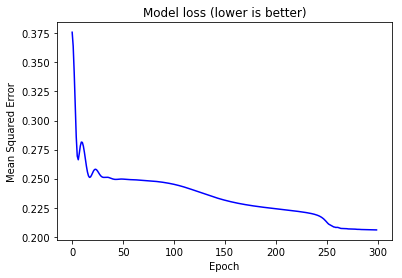

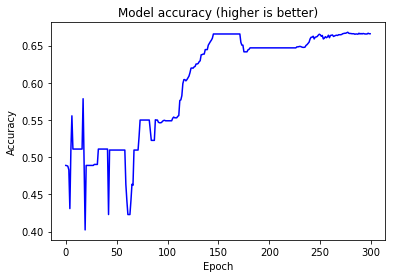

In [46]:
plt.plot(history.history['loss'], color="blue")
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['binary_accuracy'],color="blue")
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Exercise 3

**A) Draw the architecture diagram of the SRN that solves the XOR problem. You can represent connections from one layer to another by a single arrow.**

<img src="Data/5.png">

**B) It turns out that the accuracy will not get higher than 0.66. Why specifically this number (HINT: What is theoretically possible? You can see for yourself by writing out some data and trying to guess yourself what the next input will be.) Explain your answer.**

This is because every 3 outputs, one is correct because the network recognice the sequence (input sequence) and the others 2 are one correct by the 50% chance. 0.66 = 2/3


**C) This is a weird way to model XOR. But it was very important for Elman to do it this way. Why? Explain your answer.**

The advantage of this approach is that the network can take inputs of any length, without having to alter the network architecture at all.

## Network analysis

In [47]:
from plot_functions import plot_weight_matrix, plot_activation_matrix

This network is still quite simple, so let's look at the fitted weights.

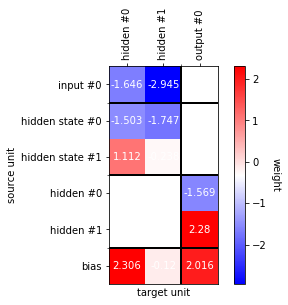

In [48]:
plot_weight_matrix(model)

Can you make sense of the weights and what it does? We can make analysis a bit easier by looking the activations of a subset of our data. In the following heatmap, you can see the input values and corresponding target outputs on the y-axis. The actual outputs are in the final column.

### Answer:

It makes sense, this way if just one of the inputs is one the activation function will fire, althought if noone or the two, the activation function will not

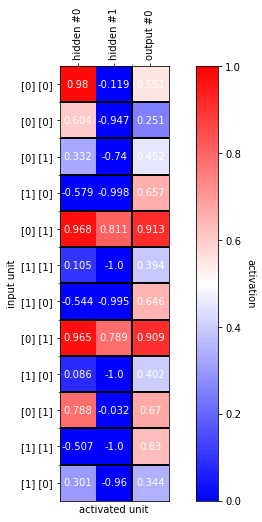

In [49]:
plt.figure(figsize=(10,8))
plot_activation_matrix(model, X, y,
                       subset=(0, slice(0, 12), slice(None)),
                       vmin=0, vmax=1)

The `subset` argument allows us to take a subset of our data using the Python `slice` function. We take only the first item of the inputs (`0`), the first 12 time steps (`slice(0, 12)`) and all input/output dimensions (`slice(None)`).

Of every three consecutive time steps, every second output should be correct since that output is the XOR of the current and previous input. We can make seeing this easier by just looking at the output layer activations and only the predictable time steps:

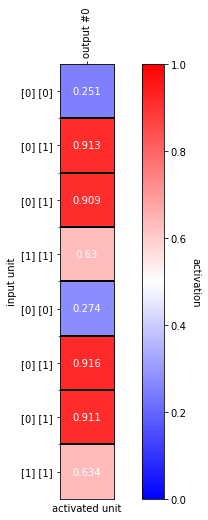

In [50]:
plt.figure(figsize=(10,8))
plot_activation_matrix(model, X, y, layers=[model.layers[1]],
                       subset=(0, slice(1, 25, 3), slice(None)),
                       vmin=0, vmax=1)

If your model gets optimal results, i.e. gets close to an accuracy of 0.66, the model's output will always be correct with respect to the target output. Look at the second value between brackets on the left hand side. This indicates that the network applies XOR on these items. What does the network do with the other two items, which are not predictable?

This network shows that neural networks are able to find structure in data, even though two thirds of the data is unpredictable.

## Exercise 4 

**A) Report the connection weights for the SRN after the training. Are they negative or positive?**

In [51]:
print(np.array(model.layers[0].get_weights()))

[array([[-1.6463649, -2.9445367]], dtype=float32)
 array([[-1.5029979 , -1.7470353 ],
       [ 1.1118759 , -0.23839073]], dtype=float32)
 array([ 2.3061292 , -0.12004864], dtype=float32)]


They are positive

**B) How can you see if the network has learned to predict XOR? Explain where you see how well the network is doing. (Hint: read the bottom of page 186-187 in Elman 1990.)**

When the network recognized a temporal sequence its outputs exhibit low error. This is an indication that the network has learned something about the temporal structure of the input, and is able to use previous context and current input to make predictions about future input.

**C) How does the network eventually solve the problem? Explain your answer.**

# Part 3: Modelling Simple Sentences with Simple Recurrent Neural Networks

The previous tutorial showed that simple RNNs are able to find structure in sequential data, even though the structure is not deterministic. Elman (1990) took this a step further in his final experiment in which he trained a simple RNN on a sequence of generated English sentences. Let's reproduce his original experiment to see for ourselves that it worked. 


_Elman, J. L. (1990). Finding structure in time. Cognitive science, 14(2), 179-211._

## Data generation

Use the small python program `sentence_generator.py` provided as part of the Lab on Nestor to generate the training set. This program follows the details that are described by Elman (1990) as closely as possible. (Tip: read the paper!) Just like in the original experiment, we will be using a concatenation of 10,000 random 2-3 word sentences without any sentence boundaries. The 29 unique words are one-hot-encoded (like Elman did!) with two extra bits that are always zero.

In [56]:
import sentence_generator
from sentence_generator import generate_sentences
from sklearn.preprocessing import LabelBinarizer

In [58]:
sents = generate_sentences(10000)
words = [word for words in sents for word in words]

What do these sentences look like?

In [59]:
sents[:8]

[['mouse', 'move', 'cat'],
 ['man', 'break', 'sandwich'],
 ['lion', 'eat', 'sandwich'],
 ['man', 'eat', 'sandwich'],
 ['woman', 'break'],
 ['girl', 'break', 'cookie'],
 ['dragon', 'break', 'cookie'],
 ['girl', 'move', 'cookie']]

These seem like decent simple sentences. But remember that the actual data is a concatenation of these sentences:

In [60]:
words[:8]

['mouse', 'move', 'cat', 'man', 'break', 'sandwich', 'lion', 'eat']

Now we have to encode the data so that our simple RNN can process it.

In [61]:
all_words = list(set(words)) + ['zog', 'zog2']

# Use one-hot-encoding to assign a unique input unit to each word
encoder = LabelBinarizer()
encoder.fit(all_words)
word_data = encoder.transform(words)

# The first axis will have size 1, just like the previous tutorial
X = word_data[np.newaxis, :]
y = np.append(word_data[1:], word_data[:1], axis=0)[np.newaxis, :]

X.shape, y.shape

((1, 27532, 31), (1, 27532, 31))

`X` and `y` both have the correct shape, so we can now create the network.

## Model definition

Now you will create a network that is very similar to the sequential XOR SRN, but follows the architecture choices of Elman.

In [62]:
# complete code here

model = Sequential([
    SimpleRNN(128, input_shape =(None,31), return_sequences=True, activation='tanh', name='hidden'),
    TimeDistributed(Dense(31, activation='softmax', name='output'))
])

The important differences between the sequential XOR SRN and this network are:
 * Greater number of hidden units (how  many?), which enables the network to learn more complex information.
 * The input shape can be defined as `(None, 31)`. The `None` value indicates that the network works with any number of time steps. Just like the output, the input must be 31-dimensional.
 * We use the `softmax` activation function in the final layer. This is the recommended choice for the output layer if the output is categorical (which it is).
 * The loss function is `categorical_crossentropy` for the same reason as above. In simple terms, categorical crossentropy is better for one-hot-encoded data because it gives more importance to that the target unit activation should be highest. MSE for instance weighs all deviations from zero for the other units equally important, so optimization gets easily stuck at the minimum of only zero outputs.
 * Our network also differs in a number of ways from Elman's because we have some different functions available. However, our results should still be comparable (and informative).

In [65]:
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.1, momentum=0.9),
              metrics=['categorical_accuracy', 'mean_squared_error'])

history = model.fit(X, y, epochs=100, verbose=2)


Epoch 1/100
 - 7s - loss: 3.1372 - categorical_accuracy: 0.1155 - mean_squared_error: 0.0305
Epoch 2/100
 - 8s - loss: 3.1165 - categorical_accuracy: 0.1207 - mean_squared_error: 0.0304
Epoch 3/100
 - 7s - loss: 3.0935 - categorical_accuracy: 0.1196 - mean_squared_error: 0.0304
Epoch 4/100
 - 7s - loss: 3.0752 - categorical_accuracy: 0.1161 - mean_squared_error: 0.0303
Epoch 5/100
 - 7s - loss: 3.0615 - categorical_accuracy: 0.1153 - mean_squared_error: 0.0303
Epoch 6/100
 - 7s - loss: 3.0480 - categorical_accuracy: 0.1211 - mean_squared_error: 0.0302
Epoch 7/100
 - 7s - loss: 3.0334 - categorical_accuracy: 0.1323 - mean_squared_error: 0.0302
Epoch 8/100
 - 6s - loss: 3.0145 - categorical_accuracy: 0.1345 - mean_squared_error: 0.0301
Epoch 9/100
 - 6s - loss: 2.9946 - categorical_accuracy: 0.1391 - mean_squared_error: 0.0300
Epoch 10/100
 - 7s - loss: 2.9644 - categorical_accuracy: 0.1450 - mean_squared_error: 0.0298
Epoch 11/100
 - 6s - loss: 2.9357 - categorical_accuracy: 0.1488 - me

Epoch 89/100
 - 7s - loss: 2.2447 - categorical_accuracy: 0.2541 - mean_squared_error: 0.0269
Epoch 90/100
 - 6s - loss: 2.2429 - categorical_accuracy: 0.2544 - mean_squared_error: 0.0269
Epoch 91/100
 - 7s - loss: 2.2412 - categorical_accuracy: 0.2545 - mean_squared_error: 0.0269
Epoch 92/100
 - 7s - loss: 2.2395 - categorical_accuracy: 0.2545 - mean_squared_error: 0.0269
Epoch 93/100
 - 6s - loss: 2.2378 - categorical_accuracy: 0.2548 - mean_squared_error: 0.0268
Epoch 94/100
 - 7s - loss: 2.2362 - categorical_accuracy: 0.2553 - mean_squared_error: 0.0268
Epoch 95/100
 - 7s - loss: 2.2346 - categorical_accuracy: 0.2553 - mean_squared_error: 0.0268
Epoch 96/100
 - 7s - loss: 2.2330 - categorical_accuracy: 0.2555 - mean_squared_error: 0.0268
Epoch 97/100
 - 7s - loss: 2.2314 - categorical_accuracy: 0.2563 - mean_squared_error: 0.0268
Epoch 98/100
 - 6s - loss: 2.2299 - categorical_accuracy: 0.2567 - mean_squared_error: 0.0268
Epoch 99/100
 - 6s - loss: 2.2284 - categorical_accuracy: 0.

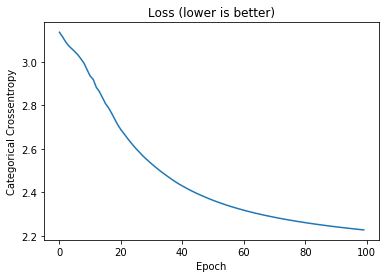

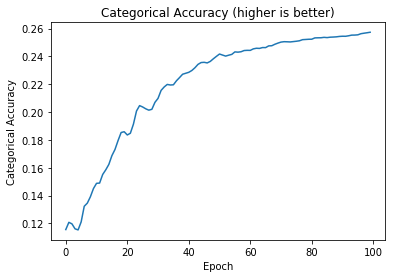

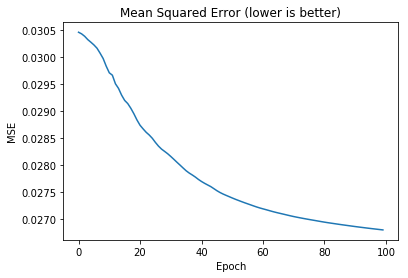

In [66]:
plt.plot(history.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

After 100 epochs, the loss gets nearly stable. The MSE metric for the final epoch is:

In [67]:
history.history['mean_squared_error'][-1] * 31

0.8307950086891651

It appears that our MSE is a bit lower than the score of Elman. Elman did however train only 6 epochs while we trained 100 epochs. (Poor guy! It probably took him days, if not weeks!)

## Exercise 5

**A) What parameters did you use to define the Elman SRN?**

**B) Elman states: "Recall that the prediction task is non-deterministic". Explain why this is so, and why using this network to solve a non-deterministic problem is more interesting than solving a deterministic one.**

**C) Commonly when training and evaluating neural networks, we are conerned about how quickly the loss decreases and how low we can get it to be. But consider: are these useful evaluation metrics for this particular problem? Why or why not? Explain your answer.**

## Network Analysis

Let's take a look at our network again. With large number of units in our network, our weight matrix is hard to visually interpret. We can still take a look at some input output combinations in our activation matrix.

/Users/pedrorodriguezdeledesmajimenez/opt/anaconda3/envs/ComputerSimulationOfLanguage/lib/python3.5/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


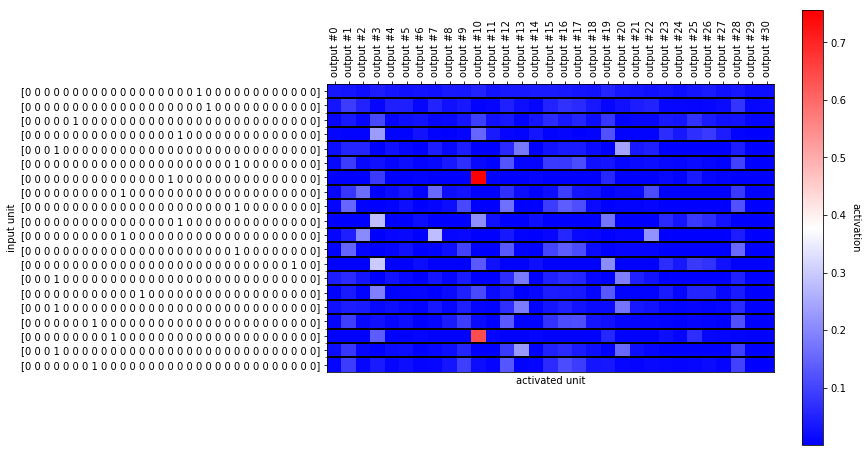

In [68]:
from plot_functions import plot_activation_matrix

plt.figure(figsize=(10,8))
plot_activation_matrix(model, X, layers=[model.layers[1]],
                       subset=(0, slice(0, 20), slice(None)),
                       show_values=False)

We can at least see that the network makes predictions and some words are more easily predictable than others. Elman (1990) created a hierarchical cluster of the mean hidden layer activation values per input word. Elman found that the hidden layer activations of similar words are also similar. Let's reproduce his dendrogram:

In [69]:
from utils import get_activation_matrix

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

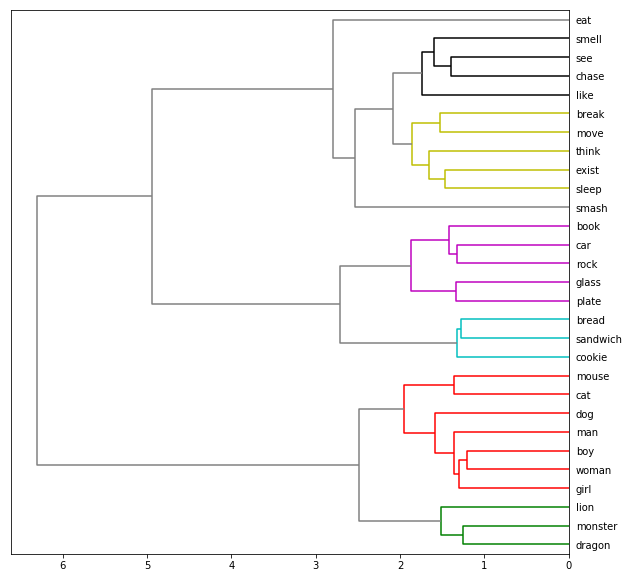

In [70]:
# Use pandas to easily calculate group means for the hidden layer
activations = pd.DataFrame(get_activation_matrix(model, X, layers=[model.layers[0]])[0])
mean_activations = activations.groupby(words).mean()

# Use scipy to create a hierarchical cluster
Z = linkage(mean_activations, method='complete', metric='euclidean', optimal_ordering=True)

plt.figure(figsize=(10,10))
dendrogram(Z,
           labels=mean_activations.index, 
           leaf_rotation=0, 
           orientation='left',
           color_threshold=2.0,
           above_threshold_color='grey')
plt.show()

## Exercise 6

**A) Training the network for 100 epochs, can you conclude that the network did learn lexical categories from the dendogram? Explain your results.**

**B) Retrain the model with only 6 epochs (like Elman). To what degree are your results similar to those that Elman got? Explain what you find.**

## Exercise 7

One of the criticisms of Elman's model was that it didn't incorporate any homonyms: all strings only belonged to one part-of-speech category, however in English it's very common for the same string to be used both as a verb and a noun (e.g. 'rock' and 'smell' can be both a verb and a noun). 

Run a new experiment to determine whether or not Elman's good results are dependent on using a grammar that avoids ambiguity, or if the same RNN is able to deal with ambiguity with little or no problem. Youc an set up this experiment any way you like, but at the very least you should modify the  the sentence_generator.py function so that sentences are created where at least one string is both a noun and a verb. Note that you may have to modify the number of input and output nodes if you increase the vocabulary size, so keep in mind how changes in the generated data might affect their ability to be used with the model we created above.

**A) Explain how you ran your experiment? How much ambiguity did you introduce and what ambiguity was it?**

**B) How does this ambiguity affect the networks ability to learn to predict the next word?**

**C) Does the network still seem to learn different syntactic and semantic classes? Explain your answer, comparing with Elman's model.**

## Exercise 8

**A) In the first lecture, 5 advantages for computational modelling were presented: (1) Study complex predictions or interactions, (2) Practicality, (3) Inspiration, (4) Control and Explanation, and (5) Explicitness. Explain how the SRN model of nouns and verbs relates to each one of the advantages. Discuss each one of these five advantages. Your answer should not be longer than 400 words.**

**B) At the end of his paper, Elman (1990) states "Some problems change their nature when expressed as temporal events", and in the paper the main example of this is the modelling of XOR in a simple feed forward network compared to an SRN. In the lab we also modelled word sequences and saw that parts-of-speech like nouns and verbs could emerge from modelling sequences. But this problem was presented as a serial one. Can you speculate on how
noun and verb detection could be learned with a simple feedforward network? What would the input look like and do you think it could successfully learn from data? What would that then mean for Elman's quote?**

In [ ]:
3/5
